# Data Munging Part II - Filtering and Joining Datasets
This lab was adapted from # Glassdoor Jobs Data-Analysis 
https://github.com/Atharva-Phatak/Glassdoor-Jobs_Data-Analysis

In Data Munging Part I we learned how to explore our data and clean it up so that missing values are removed.

In this Data Munging Part II lab, we are going to learn how to:
1. Filter our Data
2. Sort Data 
3. Merge/Concatenate Data Sources

Recall that the point of data munging is to `wrangle` multiple data sources so that you can begin to perform data analysis on the data that you were given or scraped from the web. 

In most cases you are given a dataset and you must supplement your dataset with sources from web.

In this lab we will perform analysis of Glassdoor data

## About Glassdoor

![glass](https://upload.wikimedia.org/wikipedia/commons/e/e1/Glassdoor_logo.svg)

"Glassdoor is one of the world’s largest job and recruiting sites.

Built on the foundation of increasing workplace transparency, Glassdoor offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos and more. Unlike other job sites, all of this information is shared by those who know a company best — the employees. In turn, job seekers on Glassdoor are well-researched and more informed about the jobs and companies they apply to and consider joining. This is why thousands of employers across all industries and sizes turn to Glassdoor to help them recruit and hire quality candidates at scale who stay longer. Glassdoor is available anywhere via its mobile apps."

In [61]:
# Importing Libraries
!pip3 install plotly
!pip install seaborn
!pip install nltk
!pip install gensim
!pip install yellowbrick

## Q1. Write the code to import the pandas, numpy, and matplotlib.pyplot libraries

In [62]:
#importing libraries
#WRITE THEM HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# More Data Cleaning

In the next block we are improting the libraries `plotly.express`, `gc`, `re`, and `yellowbrick`. 

## The gc python library
This library is a Garbage Collector¶. This module provides an interface to the optional garbage collector.
- It is useful for when you are working with large datasets and you pull out useful informatin from these large datasets and store them in a separate dataframe.
- Also useful if you have limited space. Some cloud servers only allow you to use a certain amount of space for free services.  (i.e. Collab, jupyter notebooks, etc.)


In [63]:
import plotly.express 
import gc 
import re 

# The re library
This is the regular expression library. You should have already been introduced to this in a previous lab. 
Go here: https://docs.python.org/3/library/re.html for more information

# Yellowbrick library
visual analysis and diagnostic tools
you may need to install it to get it to work

`pip install yellowbrick`

In [64]:
# Note if anything isn't working in this tutorial you may need to install it. See below
!pip install gensim
!pip install yellowbrick as yb

  Using cached as-0.1-py3-none-any.whl (2.2 kB)
ERROR: Could not find a version that satisfies the requirement yb (from versions: none)
ERROR: No matching distribution found for yb


In [65]:
import seaborn as sns
import nltk 
import plotly.express as px
import gc
import string
import re
import yellowbrick

#!pip install pandas plotnine
!pip install datascience

#from plotnine import *
from datascience import *

pd.set_option('display.max_colwidth', 0)
pd.options.display.max_columns = 0

## Q2. Write the code to use pandas to load the csv files Data_Job_NY.csv, Data_Job_SF.csv, Data_Job_TX.csv, and Data_Job_WA.csv into dataframes.
Name the dataframes `ny_df`, `sf_df`, `tx_df`, and `wa_df`

Remember that your csv files should be located in the data directory

In [66]:
# Load the datasets NY, SF, TX, WA
# WRITE CODE HERE
ny_df = pd.read_csv("Data_Job_NY.csv")
sf_df = pd.read_csv("Data_Job_SF.csv")
tx_df = pd.read_csv("Data_Job_TX.csv")
wa_df = pd.read_csv("Data_Job_WA.csv")
ny_df

Job_title  ...   Job_Type
0    Chief Marketing Officer (CMO)                          ...  FULL_TIME
1    Registered Nurse                                       ...  FULL_TIME
2    Dental Hygienist                                       ...  PART_TIME
3    Senior Salesforce Developer                            ...  FULL_TIME
4    DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL ADVOCACY  ...  FULL_TIME
..                                                     ...  ...        ...
895  RN / LPN                                               ...  FULL_TIME
896  Ultrasound Technologist                                ...  FULL_TIME
897  NYS Licensed Psychologist                              ...  FULL_TIME
898  Lead Pharmacy Technician: Billing                      ...  FULL_TIME
899  Experienced A level mechanic                           ...  FULL_TIME

[900 rows x 12 columns]

## Q3. Write the code to print out the count, mean, std, min, and max of all of the datasets loaded. 
Note: You'll have to run the code in a separate cell for each of the datasets

In [67]:
ny_df.describe()

,Min_Salary,Max_Salary,Rating
count,900.000000,900.000000,660.000000
mean,33789.711111,49847.461111,3.922727
std,40201.559469,59552.391775,0.651320
min,-1.000000,-1.000000,2.500000
25%,-1.000000,-1.000000,3.500000
50%,20000.000000,35000.000000,4.000000
75%,64829.000000,87057.000000,4.300000
max,125410.000000,212901.000000,5.000000


In [68]:
sf_df.describe()

,Min_Salary,Max_Salary,Rating
count,889.000000,889.00000,808.000000
mean,75989.293588,105111.84027,3.915223
std,56101.457881,75131.99965,0.666049
min,-1.000000,-1.00000,1.300000
25%,-1.000000,-1.00000,3.600000
50%,88309.000000,125886.00000,3.900000
75%,117464.000000,160387.00000,4.400000
max,205735.000000,315439.00000,5.000000


In [69]:
tx_df.describe()

,Min_Salary,Max_Salary,Rating
count,643.000000,643.000000,587.000000
mean,49856.833593,75973.337481,3.742589
std,37174.830891,55070.548762,0.593329
min,-1.000000,-1.000000,1.000000
25%,-1.000000,-1.000000,3.400000
50%,51465.000000,86476.000000,3.800000
75%,77272.000000,114060.000000,4.100000
max,195818.000000,383416.000000,5.000000


In [70]:
wa_df.describe()

,Min_Salary,Max_Salary,Rating
count,892.000000,892.000000,794.000000
mean,60523.627803,92022.095291,3.758564
std,41024.359069,59570.260961,0.567140
min,-1.000000,-1.000000,1.000000
25%,27842.000000,56870.000000,3.400000
50%,67662.000000,106081.500000,3.700000
75%,90930.250000,128731.250000,4.100000
max,179685.000000,294949.000000,5.000000


## Q4. Write the code to print the first 2 rows of the NY dataset

In [71]:
ny_df.head(2)

Job_title  ...   Job_Type
0  Chief Marketing Officer (CMO)  ...  FULL_TIME
1  Registered Nurse               ...  FULL_TIME

[2 rows x 12 columns]

## Q5. Write the code to print the name of the columns for only one of the dataframes

Note: the data was scrapted from glassdoor and will have the same column information for each dataframe loaded

In [72]:
# Print column informaiton here
ny_df.columns

Index(['Job_title', 'Company', 'State', 'City', 'Min_Salary', 'Max_Salary',
       'Job_Desc', 'Industry', 'Rating', 'Date_Posted', 'Valid_until',
       'Job_Type'],
      dtype='object')

## ***Information About the columns present in the Data***

1. The 12 columns in the datasets:
    * ***Job_title*** : The title of job which you are applying to
    * ***Company*** : Company name
    * ***State/City*** : State/City in which the companies job posting is listed.
    * ***Min_Salary*** : Minimum yearly salary in USD.
    * ***Max_Salary*** : Maximum yearly salary in USD.
    * ***Job_Desc*** : The job description which included skills,requirements,etc
    * ***Industry*** : The industry in which the company works.
    * ***Date_posted*** : The date  on which the job was posted on glassdoor
    * ***Valid_until*** : The last date of applying to the job.
    * ***Job_Type*** : Type of job full-time , part-time,etc.


### Sorting column names

You can sort the names of the columns alphabettically using the below `sorted` function
`sorted(df)` where df is the name of the dataframe

## Q6. Write the code to sort the column names alphabetically

In [73]:
# using sorted() method 
sorted(ny_df.columns)

['City',
 'Company',
 'Date_Posted',
 'Industry',
 'Job_Desc',
 'Job_Type',
 'Job_title',
 'Max_Salary',
 'Min_Salary',
 'Rating',
 'State',
 'Valid_until']

# Joining OR Concatenating Dataframes
To join dataframes together use the panda function `concat`.
`pd.concat(df1, df2, df3, ..., dfn)` where pd is the panda library name and df1 is dataframe1, df2 is dataframe2, and df3 is dataframe3

In [74]:
# Below is an example of how to concatenate the dataframes together
#Concatenating the data files

all_df = pd.concat([ny_df , sf_df , tx_df, wa_df] , axis = 0 , ignore_index = True)

# Garbage Collection
In some cases you should perform garbage collection to clear up your workspace
This is especially true when working on cloud-based systems like Collab or Jupyter notebooks

Use the `gc.collect()` function to clean up any dataframes that you don't need anymore
To do this you'll need to delete them first then call `gc.collect()`

In [75]:
del ny_df , sf_df , tx_df ,wa_df
gc.collect()

5892

## Q7. Write the output from the collect function below

27

## Q8. What do you think it means?

The number of unreachable objects found i.e the collected garbage.

# Beginning Exploratory Data Analysis

## Q9. How many rows and columns does your all_df have? Write the code below.

In [76]:
# WRITE CODE HERE
all_df.shape

(3324, 12)

In [77]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Job_title    3324 non-null   object 
 1   Company      3324 non-null   object 
 2   State        3322 non-null   object 
 3   City         3318 non-null   object 
 4   Min_Salary   3324 non-null   int64  
 5   Max_Salary   3324 non-null   int64  
 6   Job_Desc     3324 non-null   object 
 7   Industry     2700 non-null   object 
 8   Rating       2849 non-null   float64
 9   Date_Posted  3324 non-null   object 
 10  Valid_until  3324 non-null   object 
 11  Job_Type     3324 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 311.8+ KB


# Working with Data to Sort and Filter it

Sometimes the data you are given or that you have scraped will need to be converted to another format. 

In all_df, we'll mainly we working with min_salary and max_salary

To work with these values we'll need to convert them to int

In [78]:
#First let's convert min_salary and max_salary columns to int
all_df['Min_Salary'] = all_df['Min_Salary'].apply(lambda x : int(x))
all_df['Max_Salary'] = all_df['Max_Salary'].apply(lambda x : int(x))

# Working with Dates in Datasets
Many datasets have dates within them
To work with dates, and to sort and filter them properly you may need to work with only the month
or only the year or only the day.

Use the `calendar` library as shown below

In [79]:
#Extracting date and day from Date_Posted : data is the format y-m-d
import calendar
all_df['Month'] = all_df['Date_Posted'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 

## Q10 Write the code to extract the date and day from Valid Until column. 
data is the format y-m-d
Name it `all_df['Valid_Month']`

In [80]:
all_df['Valid Month'] = all_df['Valid_until'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 

## Converting Dates to Day
Sometimes you will need to convert a date into a given day
To do this, you can use the function created below called 
`Convert_to_Day`


In [81]:
def Convert_to_Day(x):
    sl = x.split('-')
    return calendar.day_abbr[int(calendar.weekday(int(sl[0]) , int(sl[1]) , int(sl[2])))]

## Q11. Use the Convert to Day function to convert the Date_Posted and Valid_Until values to days
Print out row 105 in the dataset

In [82]:
all_df['Valid_until'] = all_df['Valid_until'].apply(lambda x : Convert_to_Day(x))
all_df['Date_Posted'] = all_df['Date_Posted'].apply(lambda x : Convert_to_Day(x)) 
all_df.loc[105]

Job_title      RN/LPN (PRN)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Company        Friedwald Center for Rehabilitation and Nursing                                                                                                               

# Revisiting Working with Missing Data
In Data Munging Part I, we removed missing data

Sometimes you'll want to save that data for later so you can do some analysis on the erroneously provided or missing data
This is shown below

In [83]:
# This dataset replaced missing values with -1 
# Store that data in different data frame
index_missing = all_df[(all_df['Min_Salary'] == -1)].index

#We will use this data as our test set.
test_df = all_df.iloc[index_missing, :].reset_index(drop = True)

## Q11. Now that you have this missing data, you can now drop it from the dataframe. Write the code to do this below.
**Hint: You should use the function `drop` that follows this format
`df.drop(missing_data_index, axis=0, inplace=True)` where `df` is the dataframe
and `missing_data_index` is a list of rows to drop from the dataframe

In [84]:
all_df.drop(index_missing, axis=0, inplace=True)

# Working with Duplicates
Sometimes in your dataset because it is scraped from the web, there may be duplicates
You'll need to check for these duplicates because it will impace your data analysis

In [85]:
#Check for duplicates in the data becasue our scraper was not perfect and could have scraped multiple entries
cols = [col for col in all_df.columns if col not in ['Day' , 'Month']]

#For training data 
train_series = all_df.duplicated(cols , keep = 'first')
data_df      = all_df[~train_series].reset_index(drop = True)
test_series  = test_df.duplicated(cols , keep = 'first')
test_df      = test_df[~test_series].reset_index(drop = True)

# Looking for Unique Values in your Dataframe
Sometiems you'll need to look for unique values in your dataframe 
Use the `unique` function to do this
Follows this format `df['COL_NAME'].unique()` where df is the dataframe and COL_NAME is the column name in the dataframe

In [86]:
# Find the Unique States
print(all_df['State'].unique())

['NY' 'NJ' 'CA' 'KY' 'TX' 'TN' 'VA' 'MD' 'DC' 'NC']


## Q12. Write the code to count the number of unique States from the previous operation. Name the variable num_states and print it

In [87]:
num_states = len(all_df['State'].unique())
num_states

10

In [88]:
#Let's explore the top 5 cites in which most job lisitngs are there
for state in all_df['State'].unique():
    print(f"State of {state}")
    print(all_df[all_df['State'] == state]['City'].value_counts()[:5])

State of NY
New York         240
Staten Island    30 
Rego Park        30 
Maspeth          30 
Mamaroneck       30 
Name: City, dtype: int64
State of NJ
Paramus        30
Jersey City    30
Name: City, dtype: int64
State of CA
San Francisco          302
South San Francisco    122
Menlo Park             29 
San Mateo              27 
Redwood City           20 
Name: City, dtype: int64
State of KY
Florence    1
Name: City, dtype: int64
State of TX
Austin         132
Dallas         79 
Houston        67 
San Antonio    41 
Irving         40 
Name: City, dtype: int64
State of TN
Chennai    1
Name: City, dtype: int64
State of VA
Arlington      77
McLean         50
Reston         35
Springfield    34
Chantilly      29
Name: City, dtype: int64
State of MD
Gaithersburg     41
Rockville        36
Silver Spring    25
College Park     23
Bethesda         20
Name: City, dtype: int64
State of DC
Washington    155
Name: City, dtype: int64
State of NC
Raleigh    1
Name: City, dtype: int64


## Q13. What city has the most job openings? Write your answer below

WRITE ANSWER HERE:

* San Fransico 

## Q14. What city has the least job openings? What states do they occur in?

Chennai, TN 
Raleigh, NC &
Florence, KY each have only one opening they all have the least job openings.

# Identifying and Removing Outliers
In some cases you'll have outliers in your data. 
An `outlier` is an observation that lies an abnormal distance from other values in a random sample from a population. 
Sometimes negative numbers, zero, or really large numbers can be outliers in your sample population

See your textbook Sampling from a Population https://www.inferentialthinking.com/chapters/10/2/Sampling_from_a_Population.html

In [89]:
# Dropping the states with only one
# Saving this data for later
index_outlier = all_df[(all_df['State'] =='NC') | (all_df['State'] =='TN') | (all_df['State'] =='KY')].index
all_df.drop(index_outlier , inplace = True)

# Visualizing the Data with pie charts
The below code shows how to make a pie chart for the CA

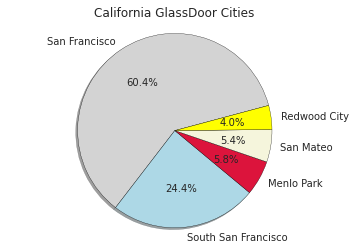

In [90]:
#Create a Pie Chart of CA and TX

max_state = ['CA' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightgray','lightblue','crimson', 'beige', 'yellow']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('California GlassDoor Cities')
plt.axis('equal')
plt.show()   

## Q15. Write the code to create a pie chart for TX. 

Add a title to your pie chart

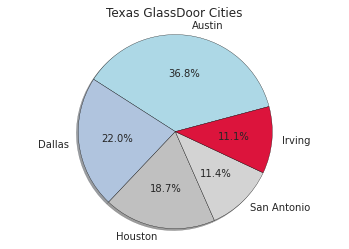

In [91]:
# Write code to create pie chart 
max_state = ['TX' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightblue','lightsteelblue','silver', 'lightgrey', 'crimson']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('Texas GlassDoor Cities')
plt.axis('equal')
plt.show() 

# Using the Groupby functionality
A groupby operation involves some combination of splitting the object, 
applying a function, and combining the results. 

This can be used to group large amounts of data and compute operations on these groups.

This is shown in the example below

In [92]:
#Calculate the minimal salary for the states 
states = all_df['State'].unique().tolist()

min_sal =  all_df.groupby('State')['Min_Salary']
max_sal =  all_df.groupby('State')['Max_Salary']

min_sal.min()


State
CA    29611
DC    21096
MD    20268
NJ    38471
NY    20000
TX    19857
VA    29516
Name: Min_Salary, dtype: int64

## Q16. Use the groupby function to find the minimal salary for all companies
Print this information

In [93]:
companies = all_df['Company'].unique().tolist()
min_comp_sal =  all_df.groupby('Company')['Min_Salary']
min_comp_sal.min()

Company
159 Solutions, Inc.          110591
1901 Group                   79171 
22nd Century Technologies    85715 
23andMe                      78913 
911 Datamaster Inc           45694 
                             ...   
price.com                    122998
steampunk                    108661
sydata                       109626
tekwissen                    24457 
vidIQ                        137812
Name: Min_Salary, Length: 959, dtype: int64

## Extracting Features out of Job Description 

In [94]:
#Let's look at  how the job description actually looks
x = all_df.Job_Desc.replace('\n\n' , '\n')
x = x.apply(lambda _ : _.split('\n'))
print(*x , sep = '\n')
# all_df.Job_Desc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Q17. What are some observations that you noticed about the job description column. What's the format or structure of the job description

It is a large text.


    
    
    
# Cleaning up HTML Artifiacts 
Sometimes you will need to clean up the data
Use the regular expression library to do that
Use the `replace` function

In [95]:
#Let's clean up the \n and remove punction marks
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n\n' , " " , regex = True)
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n' , " " , regex = True)

test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n\n' , " " , regex = True)
test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n' , " " , regex = True)
#Let's remove punctuation and Stopwords

from gensim.parsing.preprocessing import remove_stopwords
def Remove_puncutations_stopwords(s):

    s = ''.join([i for i in s if i not in string.punctuation])
    s = remove_stopwords(s)
    return s

data_df['Job_Desc'] = data_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

data_df['Job_Desc'][2]
#test_df['Job_Desc'] = test_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

'Emergency VeterinarianThe family joining VEG rapidly growing group emergency practices multiple locations single mission Helping People Their Pets When They Need Most We changing face emergency veterinary medicine “client first” mentality We’re group passionate thought leaders believe power open mind servant leadership If you’re ideal candidate you’ll Have earned DVM equivalent degree Be fulfilled helping Thrive teamoriented environments think hospital retreats team dinners happy hours Have ‘glass half full’ attitude sense humor Live breathe emergency medicine Be passionate emergency surgery soft tissue kind Benefits Why choose Because emergency best We offer Industryleading compensation signing bonus monthly bonuses Health Insurance 401K w company match Unlimited CE Flexible work schedules true worklife balance 3 shifts week fulltime Growth potential Fresh groceries sent weekly monthly quarterly contests quarterly hospital outings annual companywide retreat'

In [96]:
# Saving Data
# After you worked with some data sometimes you'll need to save it to work with later

In [97]:
all_df.to_csv("all_data.csv" , index = False)